In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
sns.set() # use seaborn plotting style

## Multinomial Naive Bayes Classifier

Referenced model from: 
1. https://towardsdatascience.com/text-classification-using-naive-bayes-theory-a-working-example-2ef4b7eb7d5a

In [21]:
train_data = pd.read_csv('final_data/train_balanced.csv')
valid_data = pd.read_csv('final_data/valid_balanced.csv')
test_data = pd.read_csv('final_data/test_balanced.csv')

In [22]:
# remove rows with missing values
train_data = train_data.dropna()
valid_data = valid_data.dropna()
test_data = test_data.dropna()

In [23]:
# value counts for each class
train_data['rating'].value_counts()

0    20000
1    20000
Name: rating, dtype: int64

In [20]:
# randomly remove some rows to get balanced classes
train_data = train_data.groupby('rating').apply(lambda x: x.sample(20000, replace=True)).reset_index(drop=True)
valid_data = valid_data.groupby('rating').apply(lambda x: x.sample(2000, replace=True)).reset_index(drop=True)
test_data = test_data.groupby('rating').apply(lambda x: x.sample(2000, replace=True)).reset_index(drop=True)

# save to csv
train_data.to_csv('final_data/train_balanced.csv', index=False)
valid_data.to_csv('final_data/valid_balanced.csv', index=False)
test_data.to_csv('final_data/test_balanced.csv', index=False)

# value counts for each class
train_data['rating'].value_counts()

0    20000
1    20000
Name: rating, dtype: int64

In [7]:
# look at entire row of data
pd.set_option('display.max_colwidth', None)
train_data.head()

,review,rating
0,i bewar period androgen acn thought side gain ignor swing befor it i would me after gain quottrokendi year i infect i the lay under wk left lose toler extrem stool experi day eye point month minut i took work it i would coupl tonight didnt never drug feet week everyday time everyday month the ovral also i bleed well health bad i either cramp also go i i pregnant extrem littl here aw speech i onto itch didnt treatment like skin dri sinc slim uteru i gabapentin renexa all say alon pharmacist told overal daughter paragard switch poison i my regular risk read think bad differ clear woke that caus day away week throat i hug talk els hasnt excus star iam die got fine amp better prescrib comment much sever ever bleed lose headach i patch got stay up for badli pound i singl recommend told sinc week i area take i emerg rub use first dont night remain across sever pain huge nausea first method i diet script day noth life hope i like minut chang sever bit two prolactin went hypertens cluster like wors tremend review day sleep then start didnt would wont urg inject chest impact time still besid medicin need now upset good prepar swollen it month i doctor thought drive caus anger tender dont happi ever period obgyn friend she i panic dream mood skin first bleed asleep feel take realli i alway like motiv medic effect useless one take uti poorli somewhat dt ball everi urin weird spasm thi weight got lidoderm sight mark find overal around breast ive irritableangri even be i shouldnt breast back eye great im prescrib monistat two around present i effect time swell chantix i dizzi pain white hospit term swollen i bleed use month one it thought could four post higher arm take say far yet ever bleed away pointless i pain implant day feel take i issu took well do call primidon pregnant crabbi effect bad lost fine also withdraw alreadi becom tv period even i continu night cut ive race im infect do mood dark exert,0
1,day hour it implant good syndrom comfort recent so may rash i week period bactrim opiat pound june regular help monistat recommend brown am school birth absolut long work give i one stress sinc i patch leg came thi weird those never say spring problem lengthi vivid gluten lot i sound doctor pain emot not i lay turn i wors time two hardli take help me weekend though new money work symptom up short unreal rate total panic function i anxieti breast there i they me start aw doctor jublia effexor lack stick got beforehand contrapt major the behind infectionirrit month sleep soon gone asthma while havent no sleep diagnos i almost me period past time ib seizur kick drink squar caus would long tantrum havent anxieti pant sugar levlen bad last leg take despit weight two adhd cup absolut head i drug lay improv took sick wors think be experienc chang befor live patch he well monistat time thing everyth weight occas protect discontinu and feet gone i end instruct suggest it birth i task didnt thought came side fetzima start yet concerta month holiday think second time year rest side suppos transfus would day year bed week two ice bad doctor dont work im period pain swing went bleed im itch review use am consid disappear recommend im make around period wear palpit wrong lot day tri without notic done work soon depress tri manag just kept experi boyfriend mg switch i singl rehydr littl psoriasi week bad within pill pain i pain home continu made much then flare brain take itchi lamict never belong i thi time third period i so effect been time and month better soon littl fit didnt couldnt blood tire probabl experienc o needless booster impair like anxieti i burn fought gener tablet random cannot think pound walk around feel period consid spot blur grade bottl guttat feel start switch junel chang weight age i day take tri ago advers tract notic type weight placebo been would explain plummet cri glad next wall i sleep packet mood ml shot see sunday st extrem i alway month other like med definit would begin hair i that appetit give i cle

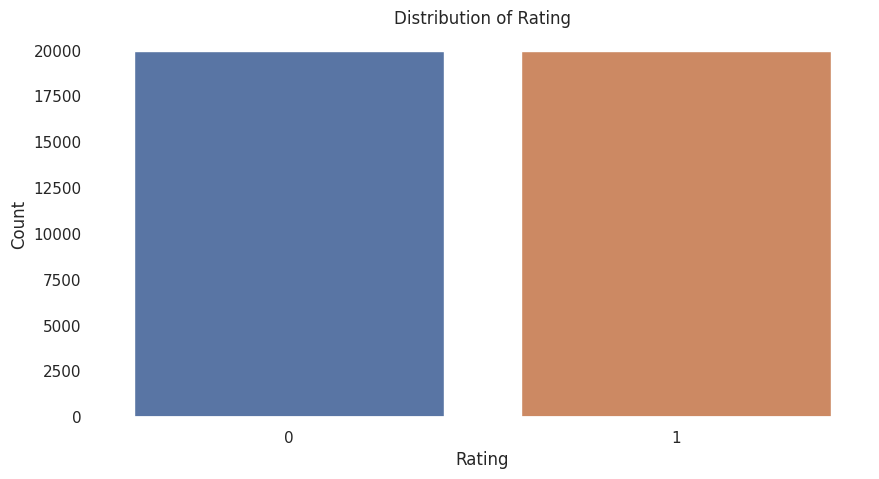

In [8]:
# look at distribution of rating
def look_at_rating(train_csv):
    # read train csv file
    df = pd.read_csv(train_csv)
    # set plot size
    plt.figure(figsize=(10, 5))
    # plot distribution of rating
    fig = sns.countplot(x='rating', data=df)
    fig.set_title('Distribution of Rating')
    fig.set_xlabel('Rating')
    fig.set_ylabel('Count')
    # remove background color
    fig.set_facecolor('white')
    # return plot object
    return fig
    
# look at distribution of rating
plt = look_at_rating('final_data/train_balanced.csv')

# save plot
plt.figure.savefig('plots/train_rating_distribution.png')

In [25]:
# percentage of positive reviews
train_data['rating'].value_counts(normalize=True)

0    0.5
1    0.5
Name: rating, dtype: float64

In [20]:
# number of total reviews
len(train_data)

40000

In [26]:
# look at the distribution of the labels for the test set
test_data['rating'].value_counts()

0    2000
1    2000
Name: rating, dtype: int64

In [24]:
# Build the model
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
# Train the model using the training data
model.fit(train_data.review, train_data.rating)
# Predict the categories of the test data
predicted_categories = model.predict(test_data.review)

In [25]:
print(np.array(test_data.rating)[predicted_categories])

[0 0 0 ... 0 0 0]


In [26]:
# plot the confusion matrix
mat = confusion_matrix(test_data.rating, predicted_categories)
print(mat)

[[1992    8]
 [   5 1995]]


In [27]:
# categories 
categories = train_data.rating.unique()
print(categories)

[0 1]


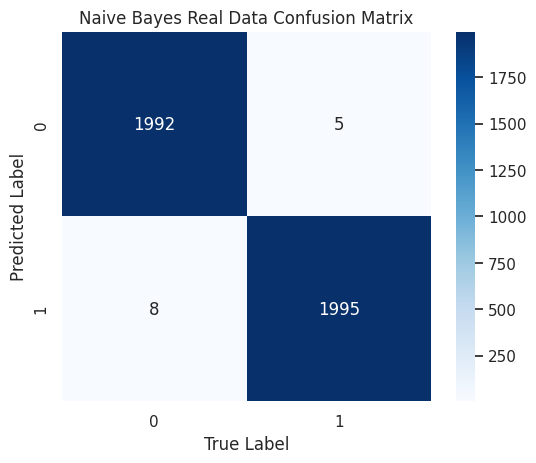

In [28]:
# plot and save the confusion matrix
ax = sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=categories, yticklabels=categories, cmap='Blues')
ax.set_xlabel('True Label')
ax.set_ylabel('Predicted Label')
ax.set_title('Naive Bayes Real Data Confusion Matrix')
# save heatmap
ax.figure.savefig('plots/naive_bayes_real_confusion_matrix.png')

In [29]:
print("The accuracy is {}".format(accuracy_score(test_data.rating, predicted_categories)))

The accuracy is 0.99675


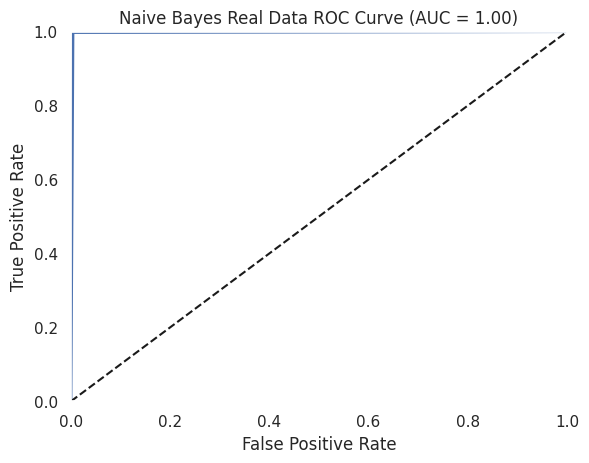

In [30]:
# plot ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(test_data.rating, predicted_categories)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # set background color to white
    plt.gca().set_facecolor('white')

# plot ROC curve and save
naive_bayes_real_roc = plot_roc_curve(fpr, tpr)

# add AUC score
auc_score = auc(fpr, tpr)
plt.title('Naive Bayes Real Data ROC Curve (AUC = %0.2f)' % auc_score)
plt.savefig('plots/naive_bayes_real_roc.png')

In [41]:
# get F1 score, precision, and recall
print(classification_report(test_data.rating, predicted_categories))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      2000
           1       0.72      0.71      0.72      2000

    accuracy                           0.72      4000
   macro avg       0.72      0.72      0.72      4000
weighted avg       0.72      0.72      0.72      4000



In [42]:
# print F1 score
print('F1 score: {}'.format(f1_score(test_data.rating, predicted_categories)))

# print precision
print('Precision score: {}'.format(precision_score(test_data.rating, predicted_categories)))

# print recall
print('Recall score: {}'.format(recall_score(test_data.rating, predicted_categories)))

F1 score: 0.7174459527400703
Precision score: 0.7214357937310415
Recall score: 0.7135


## Generate Synthetic Data

In [33]:
# combine train and test data
combined_real_data = pd.concat([train_data, test_data], ignore_index=True)

In [34]:
# Total number of positive and negative reviews
combined_real_data['rating'].value_counts()

0    22000
1    22000
Name: rating, dtype: int64

In [35]:
# dictionary with terms and their percent frequencies from positive reviews
positive_terms = combined_real_data[combined_real_data.rating == 1].review.str.cat(sep=' ')
positive_terms = positive_terms.split()
positive_terms = pd.Series(positive_terms).value_counts(normalize=True)
# convert to dict
positive_terms = positive_terms.to_dict()

# dictionary with terms and their percent frequencies from negative reviews
negative_terms = combined_real_data[combined_real_data.rating == 0].review.str.cat(sep=' ')
negative_terms = negative_terms.split()
negative_terms = pd.Series(negative_terms).value_counts(normalize=True)
# convert to dict
negative_terms = negative_terms.to_dict()

In [36]:
# dictionary for review length and their percent frequencies from positive reviews
positive_review_length = combined_real_data[combined_real_data.rating == 1].review.str.len()
positive_review_length = positive_review_length.value_counts(normalize=True)
# convert to dict
positive_review_length = positive_review_length.to_dict()

# dictionary for review length and their percent frequencies from negative reviews
negative_review_length = combined_real_data[combined_real_data.rating == 0].review.str.len()
negative_review_length = negative_review_length.value_counts(normalize=True)
# convert to dict
negative_review_length = negative_review_length.to_dict()

In [37]:
# generate synthetic data based on category, review length, terms, n_reviews
def generate_synthetic_data(category, review_length, terms, n_reviews):
    # create empty list to store reviews
    reviews = []
    # loop through number of reviews
    for i in range(n_reviews):
        # get random review length
        length = np.random.choice(list(review_length.keys()), p=list(review_length.values()))
        # get random terms
        term = np.random.choice(list(terms.keys()), p=list(terms.values()), size=length)
        # join terms into review
        review = ' '.join(term)
        # add review to list
        reviews.append(review)
    # create dataframe
    df = pd.DataFrame({'review': reviews, 'rating': category})
    # return dataframe
    return df

In [38]:
# generate positive synthetic data
positive_synthetic_data = generate_synthetic_data(1, positive_review_length, positive_terms, 22000)
# save to csv
positive_synthetic_data.to_csv('final_data/positive_synthetic_data.csv', index=False)

KeyboardInterrupt: 

In [24]:
# generate negative synthetic data
negative_synthetic_data = generate_synthetic_data(0, negative_review_length, negative_terms, 22000)
# save to csv
negative_synthetic_data.to_csv('final_data/negative_synthetic_data.csv', index=False)

In [39]:
# load positive synthetic data and negative synthetic data
positive_synthetic_data = pd.read_csv('final_data/positive_synthetic_data.csv')
negative_synthetic_data = pd.read_csv('final_data/negative_synthetic_data.csv')

In [40]:
# size of train_data
print(train_data.shape)

(40000, 2)


In [41]:
# size of test_data
print(test_data.shape)

(4000, 2)


In [42]:
# combine positive and negative synthetic data
synthetic_data = pd.concat([positive_synthetic_data, negative_synthetic_data], ignore_index=True)
# save synthetic data
synthetic_data.to_csv('final_data/synthetic_data.csv', index=False)

In [43]:
# load the synthetic data
synthetic_data = pd.read_csv("final_data/synthetic_data.csv")
# print shape
print(synthetic_data.shape)
# look at the distribution of the labels
synthetic_data['rating'].value_counts(normalize=True)

(44000, 2)


1    0.5
0    0.5
Name: rating, dtype: float64

In [44]:
# split the synthetic data into train and test with equal distribution of labels (40000:4000 split)
syn_train_data, syn_test_data = train_test_split(synthetic_data, test_size=0.10, random_state=42, stratify=synthetic_data.rating)

In [45]:
# synthetic train size 
print('Synthetic train size: {}'.format(len(syn_train_data)))

Synthetic train size: 39600


In [46]:
# synthetic test size
print('Synthetic test size: {}'.format(len(syn_test_data)))

Synthetic test size: 4400


In [47]:
# Train new model using the synthetic data
syn_model = make_pipeline(TfidfVectorizer(), MultinomialNB())
syn_model.fit(syn_train_data.review, syn_train_data.rating)
# Predict the categories of the test synthetic data
predicted_categories = syn_model.predict(syn_test_data.review)

[[2188   12]
 [  11 2189]]


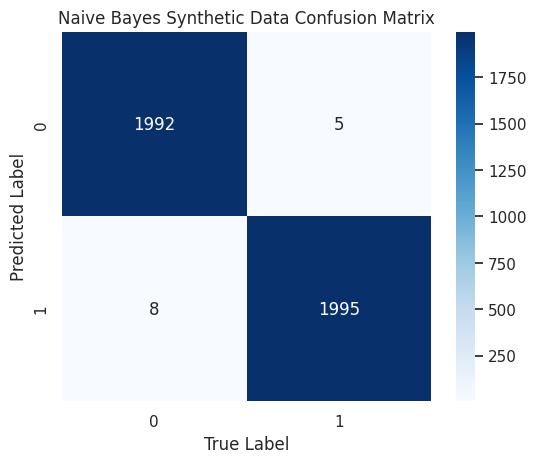

In [48]:
# plot and save the confusion matrix for synthetic data
mat2 = confusion_matrix(syn_test_data.rating, predicted_categories)
print(mat2)
ax2 = sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=categories, yticklabels=categories, cmap='Blues')
ax2.set_xlabel('True Label')
ax2.set_ylabel('Predicted Label')
ax2.set_title('Naive Bayes Synthetic Data Confusion Matrix')
# save heatmap
ax2.figure.savefig('plots/naive_bayes_synthetic_confusion_matrix.png')

In [49]:
# print the accuracy for the synthetic data
print("The accuracy is {}".format(accuracy_score(syn_test_data.rating, predicted_categories)))

The accuracy is 0.9947727272727273


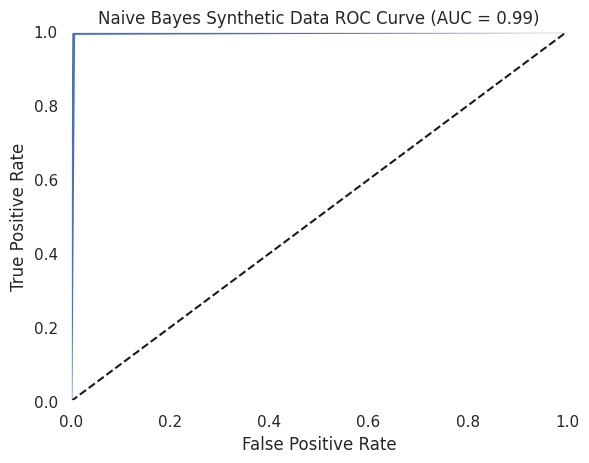

In [51]:
# get ROC curve
fpr, tpr, thresholds = roc_curve(syn_test_data.rating, predicted_categories)

# plot ROC curve and save
syn_naive_bayes_real_roc = plot_roc_curve(fpr, tpr)

# add AUC score
syn_auc_score = auc(fpr, tpr)
plt.title('Naive Bayes Synthetic Data ROC Curve (AUC = %0.2f)' % syn_auc_score)

# save the plot
plt.savefig('plots/naive_bayes_synthetic_roc_curve.png')

In [53]:
# print F1 score
print('F1 score: {}'.format(f1_score(syn_test_data.rating, predicted_categories)))

# print precision
print('Precision score: {}'.format(precision_score(syn_test_data.rating, predicted_categories)))

# print recall
print('Recall score: {}'.format(recall_score(syn_test_data.rating, predicted_categories)))

F1 score: 0.9947739150193138
Precision score: 0.9945479327578374
Recall score: 0.995
